In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy import newaxis
import math

In [140]:
data=pd.read_csv('C:/Users/ARSHTVIK/Downloads/datasets/JMTAUTOLTD_data.csv')

In [141]:
data.head()

,Date,open,high,low,close,adj_close,volume
0,2007-04-02,2.68571,2.78571,2.57143,2.58143,0.081738,77000.0
1,2007-04-03,2.62714,2.70857,2.62714,2.70714,0.085719,2450.0
2,2007-04-04,2.70857,2.75429,2.70857,2.73286,0.086533,28000.0
3,2007-04-05,2.75000,2.75000,2.75000,2.75000,0.087076,3500.0
4,2007-04-09,2.88571,2.91429,2.77143,2.86857,0.090830,30135.0


In [142]:
data.isnull().any()

Date         False
open          True
high          True
low           True
close         True
adj_close     True
volume        True
dtype: bool

In [143]:
data.dropna(inplace=True)

In [144]:
data.isnull().any()

Date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
dtype: bool

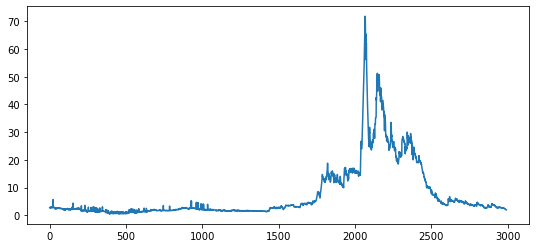

In [145]:
plt.figure(figsize=(9,4))
plt.plot(data['open'])
plt.show()

In [146]:
high=np.array(data['high'])
low=np.array(data['low'])
price=(high+low)/2

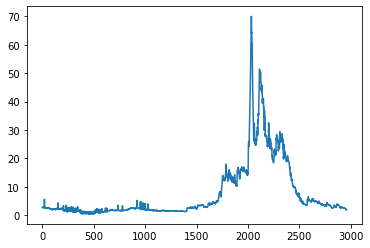

In [147]:
plt.plot(price)
plt.show()

In [148]:
train_perc=math.floor(data['high'].count()*0.9)
train_perc

2662

In [149]:
train_data=price[0:train_perc]
test_data=price[train_perc:]

In [150]:
sc=MinMaxScaler(feature_range=(0,1))
train_data=train_data.reshape(-1,1)
test_data=test_data.reshape(-1,1)
train_data=sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [151]:
def create_dataset(data,length,shuffle=False):
    gen=TimeseriesGenerator(data,data,length=5,shuffle=False)
    X=[]
    Y=[]
    for i in range(len(gen)):
        a,b=gen[i]
        for j in range(a.shape[0]):
            X.append(a[j])
            Y.append(b[j])
    
    return np.array(X),np.array(Y)

In [152]:
X_train,Y_train=create_dataset(train_data,length=5)
X_test,Y_test=create_dataset(test_data,length=5)

In [153]:
model = Sequential([
LSTM(256,return_sequences=True),
LSTM(512,return_sequences=True),
Dropout(0.25),
LSTM(1024,return_sequences=False),
Dropout(0.3),
Dense(1),
])

In [154]:
model.compile(optimizer='adam',loss='mse')

In [155]:
history=model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
84/84 [==============================] - 16s 195ms/step - loss: 0.0030
Epoch 2/5
84/84 [==============================] - 16s 186ms/step - loss: 6.1868e-04
Epoch 3/5
84/84 [==============================] - 17s 206ms/step - loss: 6.7123e-04
Epoch 4/5
84/84 [==============================] - 27s 318ms/step - loss: 5.5539e-04
Epoch 5/5
84/84 [==============================] - 2

In [156]:
fut=model.predict(X_test)
pres=model.predict(X_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [157]:
future=sc.inverse_transform(fut)
past=sc.inverse_transform(pres)
true_y=sc.inverse_transform(Y_test.reshape(-1,1))
past_y=sc.inverse_transform(Y_train.reshape(-1,1))
print(future.shape)
print(true_y.shape)

(291, 1)
(291, 1)


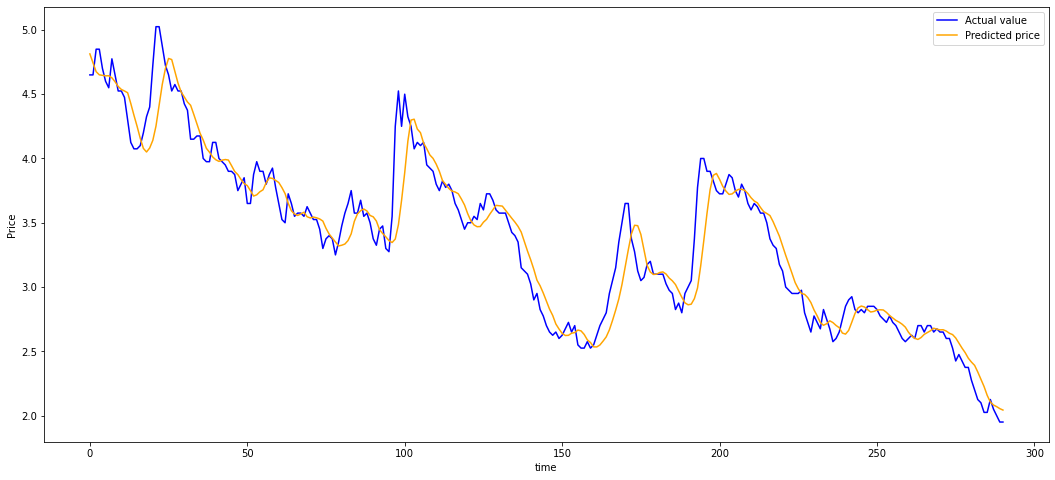

In [158]:
plt.figure(figsize=(18,8))
plt.plot(true_y,color='blue',label='Actual value')
plt.plot(future,color='orange',label='Predicted price')
plt.ylabel('Price')
plt.xlabel('time')
plt.legend()
plt.show()

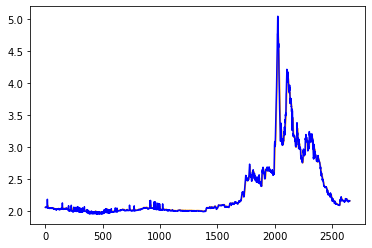

In [159]:
plt.plot(past,color='orange')
plt.plot(past_y,color='blue')
plt.show()

In [160]:
avg=np.reshape(price,(-1,1))
avg=sc.fit_transform(avg)
X,Y=create_dataset(avg,length=5)

In [161]:
predictions=model.predict(X)

In [162]:
g=np.append(avg,predictions)

In [163]:
saved_model_path = "JMT/jmt.h5"
model.save(saved_model_path)

In [164]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./